# Analiza pobieranych świadczeń

In [27]:
#import pliku i usunięcie wierszy bez żadnych wartości w kolumnie "Wartosc"
import pandas as pd
import matplotlib.pyplot as plt
data_path_ludnosc = "ludnosc.csv"
data_path_gminy = "gminy.csv"
df_ludnosc = pd.read_csv(data_path_ludnosc, sep=";", decimal=',')
df_ludnosc = df_ludnosc[df_ludnosc['Wartosc'].notna()]

In [48]:
social_benefits = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc["Jednostka miary"] == "zł") & (df_ludnosc["Zmienna"] == "ze świadczeń społecznych")]
social_benefits = social_benefits.drop(['Atrybut','Unnamed: 8'], axis=1)
social_benefits = social_benefits.sort_values('Wartosc', ascending=False)
display(social_benefits)


,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary
17977,Dochody,2400000,ŚLĄSKIE,ze świadczeń społecznych,2020,738.73,zł
18769,Dochody,3200000,ZACHODNIOPOMORSKIE,ze świadczeń społecznych,2020,736.94,zł
17976,Dochody,2400000,ŚLĄSKIE,ze świadczeń społecznych,2019,700.17,zł
18174,Dochody,2600000,ŚWIĘTOKRZYSKIE,ze świadczeń społecznych,2019,655.46,zł
15997,Dochody,400000,KUJAWSKO-POMORSKIE,ze świadczeń społecznych,2020,650.88,zł
...,...,...,...,...,...,...,...
18550,Dochody,3000000,WIELKOPOLSKIE,ze świadczeń społecznych,1999,167.77,zł
18748,Dochody,3200000,ZACHODNIOPOMORSKIE,ze świadczeń społecznych,1999,163.69,zł
15976,Dochody,400000,KUJAWSKO-POMORSKIE,ze świadczeń społecznych,1999,163.04,zł
18154,Dochody,2600000,ŚWIĘTOKRZYSKIE,ze świadczeń społecznych,1999,161.64,zł


## Największy pobór w całym analizowanym okresie

In [49]:
display(social_benefits.head(3))

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary
17977,Dochody,2400000,ŚLĄSKIE,ze świadczeń społecznych,2020,738.73,zł
18769,Dochody,3200000,ZACHODNIOPOMORSKIE,ze świadczeń społecznych,2020,736.94,zł
17976,Dochody,2400000,ŚLĄSKIE,ze świadczeń społecznych,2019,700.17,zł


## Średnia pobieranych świadczeń w całym okresie

In [64]:
mean_social = social_benefits.drop(['Rok','Kod'], axis=1)
mean_social = mean_social.groupby(['Nazwa']).mean().sort_values('Wartosc', ascending=False)
display(mean_social)

,Wartosc
Nazwa,
ŚLĄSKIE,410.814091
DOLNOŚLĄSKIE,373.388636
ZACHODNIOPOMORSKIE,364.607273
OPOLSKIE,361.254545
LUBUSKIE,359.875000
ŁÓDZKIE,359.543636
POLSKA,350.385000
ŚWIĘTOKRZYSKIE,350.278636
KUJAWSKO-POMORSKIE,344.282727


## Rozkład w poszczególnych latach

,Rok,count,mean,std,min,25%,50%,75%,max,delta
0,1999,17.0,178.781765,15.117807,156.05,167.77,174.12,187.22,211.89,0.000000
1,2000,17.0,194.380000,14.977053,170.66,185.59,190.23,199.62,227.13,0.087247
2,2001,17.0,214.251176,13.357321,199.58,206.09,210.65,218.69,253.71,0.102229
3,2002,17.0,226.974706,15.131946,205.26,217.54,225.38,231.91,265.75,0.059386
4,2003,17.0,254.211765,19.536804,209.61,246.60,254.07,260.85,302.70,0.120000
5,2004,17.0,257.821176,26.253055,214.03,239.95,250.78,282.28,308.99,0.014198
6,2005,17.0,263.975882,22.662863,234.03,248.70,265.37,274.22,318.79,0.023872
7,2006,17.0,277.902353,18.435537,257.46,262.06,274.25,287.55,324.93,0.052757
8,2007,17.0,282.718235,22.548111,240.95,268.19,282.42,295.21,323.99,0.017329
9,2008,17.0,298.114706,23.525669,268.85,277.70,295.03,313.98,339.31,0.054459


,Rok,count,mean,std,min,25%,50%,75%,max,delta
17,2016,17.0,460.904118,27.562499,420.20,445.03,456.13,473.03,535.89,0.153563
4,2003,17.0,254.211765,19.536804,209.61,246.60,254.07,260.85,302.70,0.120000
20,2019,17.0,586.906471,46.016706,534.13,554.04,579.83,605.90,700.17,0.112125


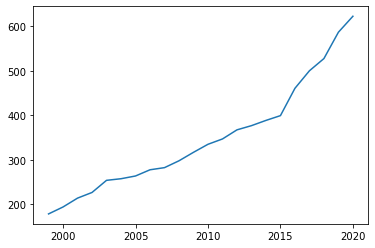

In [102]:
#mean_social = social_benefits.drop(['Rok','Kod'], axis=1)
describe_social = social_benefits.groupby(['Rok'])['Wartosc'].describe().reset_index()

changes_of_mean = [0]
for i in range(1,len(describe_social.index)):
    changes = (describe_social['mean'][i] / describe_social['mean'][i-1])-1
    changes_of_mean.append(changes) 
describe_social['delta'] = changes_of_mean

display(describe_social)

plt.figure()
plt.plot(describe_social['Rok'], describe_social['mean'])


### w którym roku social wzrósł najbardziej? 

In [103]:
display(describe_social.sort_values('delta', ascending=False).head(3))

,Rok,count,mean,std,min,25%,50%,75%,max,delta
17,2016,17.0,460.904118,27.562499,420.20,445.03,456.13,473.03,535.89,0.153563
4,2003,17.0,254.211765,19.536804,209.61,246.60,254.07,260.85,302.70,0.120000
20,2019,17.0,586.906471,46.016706,534.13,554.04,579.83,605.90,700.17,0.112125
